In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from PIL import Image

In [7]:
# import csv
df = pd.read_csv('/Users/ianforrest/Downloads/novel-corona-virus-2019-dataset/covid_19_data.csv')
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [14]:
df.shape

(7014, 8)

In [12]:
df1 = pd.read_csv('/Users/ianforrest/Downloads/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv')
df1.head()

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,...,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df1.shape

(1085, 27)

In [11]:
df2 = pd.read_csv('/Users/ianforrest/Downloads/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv')
df2 = df2[['ID', 'age', 'sex', 'city', 'province', 'country',
       'wuhan(0)_not_wuhan(1)', 'latitude', 'longitude', 'geo_resolution',
       'date_onset_symptoms', 'date_admission_hospital', 'date_confirmation',
       'symptoms', 'lives_in_Wuhan', 'travel_history_dates',
       'travel_history_location', 'reported_market_exposure',
       'additional_information', 'chronic_disease_binary', 'chronic_disease',
       'source', 'sequence_available', 'outcome', 'date_death_or_discharge',
       'notes_for_discussion', 'location', 'admin3', 'admin2', 'admin1',
       'country_new', 'admin_id', 'data_moderator_initials']]
df2.head()


,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,...,NaN,NaN,NaN,NaN,Chaohu City,Hefei City,Anhui,China,340181,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,...,NaN,NaN,NaN,NaN,Baohe District,Hefei City,Anhui,China,340111,NaN
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN
3,4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN
4,5.0,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,...,NaN,NaN,NaN,NaN,Feidong County,Hefei City,Anhui,China,340122,NaN


In [35]:
df2['count']=df2.groupby(["country", "province", "city"]).size()

TypeError: incompatible index of inserted column with frame index

In [31]:
# Extract the data we're interested in
lat = df2['latitude'].values
lon = df2['longitude'].values
sex = df2['sex'].values

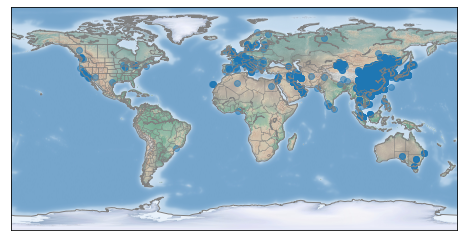

In [33]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap()
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True, alpha=0.5)

# for i in range(len(df2)):
#     x, y = m(df2['longitude'][i], df2['latitude'][i])
#     plt.plot(x, y, 'ok', markersize=1.5)
plt.show();

In [44]:
df2['outcome'].value_counts()

stable                                                                      78
discharge                                                                   45
discharged                                                                  37
death                                                                       12
died                                                                         3
Discharged                                                                   2
recovered                                                                    2
05.02.2020                                                                   1
Symptoms only improved with cough. Currently hospitalized for follow-up.     1
treated in an intensive care unit (14.02.2020)                               1
severe                                                                       1
critical condition, intubated as of 14.02.2020                               1
Name: outcome, dtype: int64

In [51]:
df2 = df2[df2['outcome'] == 'death']

In [52]:
df2.shape

(12, 33)

In [54]:
df2 = df2[['ID', 'age', 'sex', 'city', 'province', 'country',
       'date_onset_symptoms', 'date_admission_hospital', 'date_confirmation',
       'symptoms', 'lives_in_Wuhan', 'travel_history_dates',
       'travel_history_location', 'reported_market_exposure',
       'additional_information', 'chronic_disease_binary', 'chronic_disease',
       'notes_for_discussion',
       ]]
df2

,ID,age,sex,city,province,country,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,reported_market_exposure,additional_information,chronic_disease_binary,chronic_disease,notes_for_discussion
1426,1443.0,82,female,"Chengguan District, Lanzhou City",Gansu,China,NaN,25.01.2020,27.01.2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1848,1872.0,80-89,male,Paris,Ile-de-France,France,NaN,NaN,28.01.2020,NaN,NaN,NaN,Hubei,NaN,NaN,NaN,NaN,NaN
5050,5121.0,73,female,"Xigu District, Lanzhou City",Gansu,China,28.01.2020,31.01.2020,02.02.2020,fever,no,NaN,NaN,NaN,family cluster?,NaN,NaN,NaN
10972,11272.0,80-89,female,NaN,Kanagawa Prefecture,Japan,22.01.2020,01.02.2020,13.02.2020,"anorexia, fatigue",NaN,NaN,NaN,NaN,Case 27;,NaN,NaN,NaN
11015,11321.0,60-69,male,NaN,Taiwan,NaN,27.01.2020,03.02.2020,15.02.2020,"cough, shortness of breath",NaN,NaN,NaN,NaN,NaN,1.0,"hepatitis B, diabetes",NaN
11192,11498.0,NaN,NaN,Qom,Qom,Iran,NaN,NaN,19.02.2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11193,11499.0,NaN,NaN,Qom,Qom,Iran,NaN,NaN,19.02.2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11219,11525.0,77,female,Codogno,Lombardia,Italy,NaN,NaN,21.02.2020,NaN,NaN,NaN,NaN,NaN,Patient at Codogno hospital,NaN,NaN,NaN
11220,11526.0,78,male,Vo Euganeo,Veneto,Italy,NaN,NaN,21.02.2020,NaN,NaN,NaN,NaN,NaN,Hospitalized on 12.02.2020 for other reasons,NaN,NaN,NaN
11222,11528.0,68,female,Cremona,Lombardia,Italy,NaN,NaN,21.02.2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"I believe is Cremona, not Codogno"


In [18]:
df2.columns

Index(['ID', 'age', 'sex', 'city', 'province', 'country',
       'wuhan(0)_not_wuhan(1)', 'latitude', 'longitude', 'geo_resolution',
       'date_onset_symptoms', 'date_admission_hospital', 'date_confirmation',
       'symptoms', 'lives_in_Wuhan', 'travel_history_dates',
       'travel_history_location', 'reported_market_exposure',
       'additional_information', 'chronic_disease_binary', 'chronic_disease',
       'source', 'sequence_available', 'outcome', 'date_death_or_discharge',
       'notes_for_discussion', 'location', 'admin3', 'admin2', 'admin1',
       'country_new', 'admin_id', 'data_moderator_initials', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44'],
      dtype='object')

In [59]:
df3 = pd.read_csv('/Users/ianforrest/Downloads/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv')
df3 = df3.sort_values(by=['3/19/20'], ascending=False)
df3 = df3[['Country/Region', 'Province/State','Lat', 'Long', '1/22/20', '2/15/20', '3/1/20','3/10/20','3/19/20']]
df3.head(25)

,Country/Region,Province/State,Lat,Long,1/22/20,2/15/20,3/1/20,3/10/20,3/19/20
154,China,Hubei,30.9756,112.2707,444,56249,66907,67760,67800
16,Italy,NaN,43.0000,12.0000,0,3,1694,10149,41035
155,Iran,NaN,32.0000,53.0000,0,0,978,8042,18407
18,Spain,NaN,40.0000,-4.0000,0,2,84,1695,17963
11,Germany,NaN,51.0000,9.0000,0,16,130,1457,15320
157,France,France,46.2276,2.2137,0,12,130,1784,10871
156,"Korea, South",NaN,36.0000,128.0000,1,28,3736,7513,8565
99,US,New York,42.1657,-74.9481,0,0,0,173,5365
31,Switzerland,NaN,46.8182,8.2275,0,0,27,491,4075
403,United Kingdom,United Kingdom,55.3781,-3.4360,0,9,36,382,2689


In [22]:
df3.shape

(468, 62)

In [57]:
df4 = pd.read_csv('/Users/ianforrest/Downloads/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv')
df4 = df4.sort_values(by=['3/19/20'], ascending=False)
df4 = df4[['Country/Region', 'Province/State','Lat', 'Long', '1/22/20', '2/15/20', '3/1/20','3/10/20','3/19/20']]
df4.head(30)

,Country/Region,Province/State,Lat,Long,1/22/20,2/15/20,3/1/20,3/10/20,3/19/20
16,Italy,NaN,43.0000,12.0000,0,0,34,631,3405
154,China,Hubei,30.9756,112.2707,17,1596,2761,3024,3130
155,Iran,NaN,32.0000,53.0000,0,0,54,291,1284
18,Spain,NaN,40.0000,-4.0000,0,0,0,35,830
157,France,France,46.2276,2.2137,0,1,2,33,243
403,United Kingdom,United Kingdom,55.3781,-3.4360,0,0,0,6,137
156,"Korea, South",NaN,36.0000,128.0000,0,0,17,54,91
440,Netherlands,Netherlands,52.1326,5.2913,0,0,0,4,76
98,US,Washington,47.4009,-121.4905,0,0,0,23,74
11,Germany,NaN,51.0000,9.0000,0,0,0,2,44


In [28]:
df4.shape

(468, 62)

In [60]:
df5 = pd.read_csv('/Users/ianforrest/Downloads/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv')
df5 = df5.sort_values(by=['3/19/20'], ascending=False)
df5 = df5[['Country/Region', 'Province/State','Lat', 'Long', '1/22/20', '2/15/20', '3/1/20','3/10/20','3/19/20']]
df5.head(25)

,Country/Region,Province/State,Lat,Long,1/22/20,2/15/20,3/1/20,3/10/20,3/19/20
154,China,Hubei,30.9756,112.2707,28,5623,31536,47743,57682
155,Iran,NaN,32.0000,53.0000,0,0,175,2731,5710
16,Italy,NaN,43.0000,12.0000,0,0,83,724,4440
156,"Korea, South",NaN,36.0000,128.0000,0,9,30,247,1540
158,China,Guangdong,23.3417,113.4244,0,410,1016,1274,1318
159,China,Henan,33.8820,113.6140,0,391,1198,1247,1250
160,China,Zhejiang,29.1832,120.0934,0,428,1046,1191,1217
18,Spain,NaN,40.0000,-4.0000,0,2,2,32,1107
161,China,Hunan,27.6104,111.7088,0,425,866,990,1014
162,China,Anhui,31.8257,117.2264,0,221,873,984,984
